In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# predicting employee salary based on experience

salary = pd.read_csv("Employee_salary.csv")
salary.tail(10)

,Years of Experience,Salary
1990,18.583977,374277.2253
1991,18.806528,390051.2268
1992,18.817387,392165.2403
1993,19.063416,413149.8396
1994,19.164009,420555.4056
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [6]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [7]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


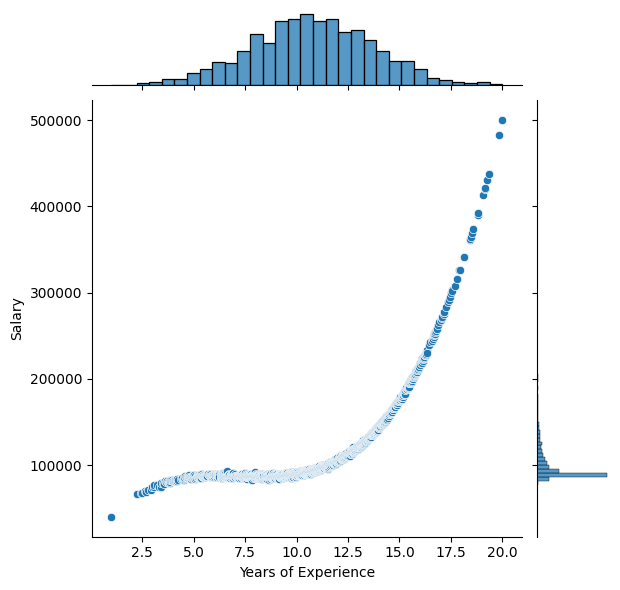

In [8]:
# visualizing dataset
sns.jointplot(x = 'Years of Experience', y = 'Salary', data=salary)

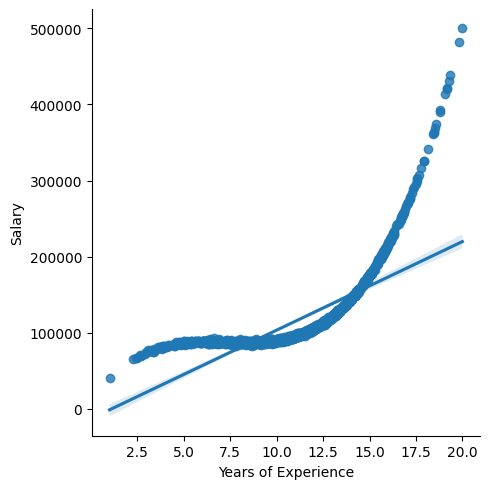

In [9]:
sns.lmplot(x = 'Years of Experience', y = 'Salary', data=salary)

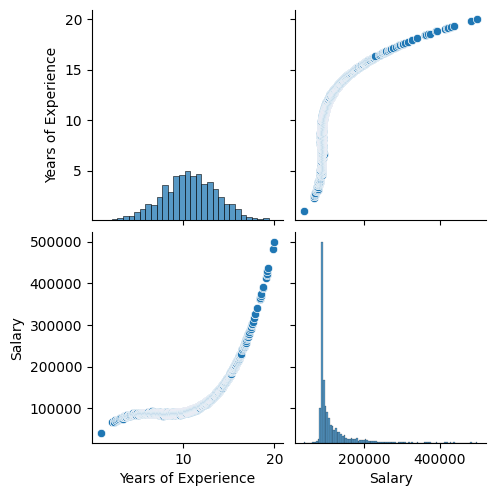

In [10]:
sns.pairplot(salary)

In [14]:
# create training dataset
X = salary[['Years of Experience']]
X.shape

(2000, 1)

In [16]:
Y = salary[['Salary']]
Y.shape

(2000, 1)

In [17]:
# assign training and testing data
X_train = X
y_train = Y

In [18]:
# linear assumption
from sklearn.linear_model import LinearRegression


In [19]:
regressor = LinearRegression(fit_intercept=True)


In [20]:
regressor.fit(X_train, y_train)

LinearRegression()

In [21]:
print('Slope of the graph(Coefficient -m): ', regressor.coef_)
print('Linear model Intercept (b): ',regressor.intercept_)

Slope of the graph(Coefficient -m):  [[11640.22916165]]
Linear model Intercept (b):  [-13063.09931519]


Text(0.5, 1.0, 'Salary vs Years of Experience (Linear Assumption)')

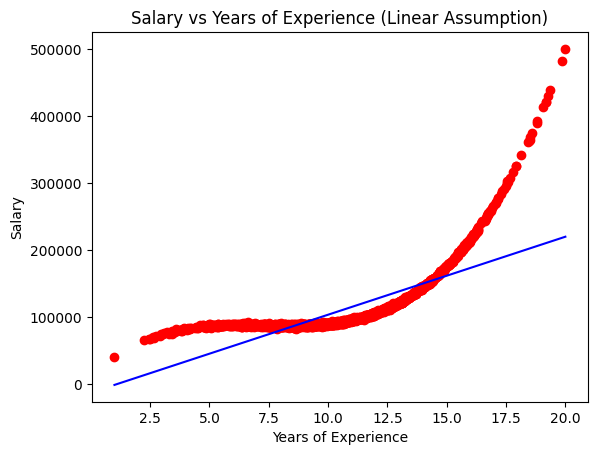

In [26]:
# visualize the results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience (Linear Assumption)')

In [27]:
# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
poly_regressor = PolynomialFeatures(degree = 2)

In [29]:
X_columns = poly_regressor.fit_transform(X_train) # transform X_train column to multiple array of features

In [30]:
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [ ]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)